### Importing Necessities

In [ ]:
import os
import warnings
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import svm, metrics, model_selection, preprocessing

import tensorflow as tf

In [ ]:
warnings.filterwarnings("ignore")

### Data Analysis

In [ ]:
path = os.path.join("/content/Genetic_Disorders.csv")

df = pd.read_csv(path)

In [ ]:
df.shape

(22083, 45)

In [ ]:
target = "Genetic Disorder"
labels = np.array(['Mitochondrial genetic inheritance disorders', 'Multifactorial genetic inheritance disorders', 'Single-gene inheritance diseases'])

In [ ]:
df.head(10)

,Patient Id,Patient Age,Genes in mother's side,Inherited from father,Maternal gene,Paternal gene,Blood cell count (mcL),Patient First Name,Family Name,Father's name,...,Birth defects,White Blood cell count (thousand per microliter),Blood test result,Symptom 1,Symptom 2,Symptom 3,Symptom 4,Symptom 5,Genetic Disorder,Disorder Subclass
0,PID0x6418,2.0,Yes,No,Yes,No,4.760603,Richard,NaN,Larre,...,NaN,9.857562,NaN,1.0,1.0,1.0,1.0,1.0,Mitochondrial genetic inheritance disorders,Leber's hereditary optic neuropathy
1,PID0x25d5,4.0,Yes,Yes,No,No,4.910669,Mike,NaN,Brycen,...,Multiple,5.522560,normal,1.0,NaN,1.0,1.0,0.0,NaN,Cystic fibrosis
2,PID0x4a82,6.0,Yes,No,No,No,4.893297,Kimberly,NaN,Nashon,...,Singular,NaN,normal,0.0,1.0,1.0,1.0,1.0,Multifactorial genetic inheritance disorders,Diabetes
3,PID0x4ac8,12.0,Yes,No,Yes,No,4.705280,Jeffery,Hoelscher,Aayaan,...,Singular,7.919321,inconclusive,0.0,0.0,1.0,0.0,0.0,Mitochondrial genetic inheritance disorders,Leigh syndrome
4,PID0x1bf7,11.0,Yes,No,NaN,Yes,4.720703,Johanna,Stutzman,Suave,...,Multiple,4.098210,NaN,0.0,0.0,0.0,0.0,NaN,Multifactorial genetic inheritance disorders,Cancer
5,PID0x44fe,14.0,Yes,No,Yes,No,5.103188,Richard,NaN,Coleston,...,Multiple,10.272230,normal,1.0,0.0,0.0,1.0,0.0,Single-gene inheritance diseases,Cystic fibrosis
6,PID0x28de,3.0,Yes,No,Yes,Yes,4.901080,Mary,NaN,Aydun,...,Multiple,6.825974,normal,0.0,0.0,0.0,0.0,0.0,Single-gene inheritance diseases,Tay-Sachs
7,PID0x4f8f,3.0,No,No,Yes,Yes,4.964816,Emma,Bryant,Keng,...,Singular,9.836352,inconclusive,0.0,0.0,1.0,NaN,0.0,Single-gene inheritance diseases,Tay-Sachs
8,PID0x8ce3,11.0,No,No,Yes,No,5.209058,Willie,Camacho,Tr,...,Multiple,6.669552,slightly abnormal,1.0,1.0,1.0,0.0,1.0,Mitochondrial genetic inheritance disorders,Leigh syndrome
9,PID0x8660,4.0,No,Yes,Yes,Yes,4.752272,John,Sandoval,Gregori,...,Multiple,6.397702,abnormal,0.0,0.0,1.0,1.0,1.0,Multifactorial genetic inheritance disorders,Diabetes


In [ ]:
df.tail(10)

,Patient Id,Patient Age,Genes in mother's side,Inherited from father,Maternal gene,Paternal gene,Blood cell count (mcL),Patient First Name,Family Name,Father's name,...,Birth defects,White Blood cell count (thousand per microliter),Blood test result,Symptom 1,Symptom 2,Symptom 3,Symptom 4,Symptom 5,Genetic Disorder,Disorder Subclass
22073,PID0xbd,13.0,Yes,Yes,No,Yes,4.874635,Rosa,NaN,Donovin,...,NaN,NaN,normal,0.0,0.0,0.0,1.0,1.0,NaN,Leigh syndrome
22074,PID0x6a0a,4.0,No,No,NaN,No,4.789307,Randy,Howell,Javontay,...,Multiple,NaN,normal,0.0,0.0,1.0,0.0,0.0,Single-gene inheritance diseases,Hemochromatosis
22075,PID0x5f56,10.0,No,No,Yes,Yes,4.643860,Edward,Thomas,Eoghan,...,Multiple,9.581455,abnormal,1.0,0.0,0.0,0.0,NaN,Mitochondrial genetic inheritance disorders,Mitochondrial myopathy
22076,PID0x26b4,0.0,Yes,No,Yes,No,4.931758,Samuel,NaN,Kiril,...,Singular,11.649052,abnormal,1.0,1.0,0.0,1.0,0.0,Mitochondrial genetic inheritance disorders,Leigh syndrome
22077,PID0x3656,9.0,No,Yes,Yes,Yes,5.012599,Edward,Hurst,Quientin,...,NaN,12.000000,slightly abnormal,NaN,1.0,0.0,0.0,0.0,Mitochondrial genetic inheritance disorders,Leigh syndrome
22078,PID0x5598,4.0,Yes,Yes,Yes,No,5.258298,Lynn,NaN,Alhassane,...,Multiple,6.584811,inconclusive,0.0,0.0,1.0,0.0,0.0,Mitochondrial genetic inheritance disorders,Leigh syndrome
22079,PID0x19cb,8.0,No,Yes,No,Yes,4.974220,Matthew,Farley,Dartanion,...,Multiple,7.041556,inconclusive,1.0,1.0,1.0,1.0,0.0,Multifactorial genetic inheritance disorders,Diabetes
22080,PID0x3c4f,8.0,Yes,No,Yes,No,5.186470,John,NaN,Cavani,...,Singular,7.715464,normal,0.0,0.0,0.0,1.0,NaN,Mitochondrial genetic inheritance disorders,Mitochondrial myopathy
22081,PID0x13a,7.0,Yes,No,Yes,Yes,4.858543,Sharon,NaN,Bomer,...,Multiple,8.437670,abnormal,1.0,1.0,1.0,0.0,0.0,NaN,Leigh syndrome
22082,PID0x9332,11.0,Yes,No,No,No,4.738067,Andrew,Mose,Eban,...,Singular,11.188371,normal,1.0,0.0,1.0,1.0,1.0,Multifactorial genetic inheritance disorders,Diabetes


In [ ]:
df.dtypes

Patient Id                                           object
Patient Age                                         float64
Genes in mother's side                               object
Inherited from father                                object
Maternal gene                                        object
Paternal gene                                        object
Blood cell count (mcL)                              float64
Patient First Name                                   object
Family Name                                          object
Father's name                                        object
Mother's age                                        float64
Father's age                                        float64
Institute Name                                       object
Location of Institute                                object
Status                                               object
Respiratory Rate (breaths/min)                       object
Heart Rate (rates/min                   

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22083 entries, 0 to 22082
Data columns (total 45 columns):
 #   Column                                            Non-Null Count  Dtype  
---  ------                                            --------------  -----  
 0   Patient Id                                        22083 non-null  object 
 1   Patient Age                                       20656 non-null  float64
 2   Genes in mother's side                            22083 non-null  object 
 3   Inherited from father                             21777 non-null  object 
 4   Maternal gene                                     19273 non-null  object 
 5   Paternal gene                                     22083 non-null  object 
 6   Blood cell count (mcL)                            22083 non-null  float64
 7   Patient First Name                                22083 non-null  object 
 8   Family Name                                       12392 non-null  object 
 9   Father's name    

In [ ]:
# Removing irrelevant and unnecessary columns

irrelevant_cols = ["Patient Id", "Patient First Name", "Family Name", "Father's name", "Institute Name",
                   "Autopsy shows birth defect (if applicable)", "Location of Institute", "Test 1", "Test 2", "Test 3", "Test 4",
                   "Test 5", "Parental consent", "H/O serious maternal illness", "H/O radiation exposure (x-ray)",
                   "H/O substance abuse", "Birth asphyxia"]

df.drop(irrelevant_cols, axis = 1, inplace = True)

print(df.shape)

(22083, 28)


In [ ]:
# Checking for null values

df.isna().sum()

Patient Age                                         1427
Genes in mother's side                                 0
Inherited from father                                306
Maternal gene                                       2810
Paternal gene                                          0
Blood cell count (mcL)                                 0
Mother's age                                        6036
Father's age                                        5986
Status                                                 0
Respiratory Rate (breaths/min)                      2149
Heart Rate (rates/min                               2113
Follow-up                                           2166
Gender                                              2173
Place of birth                                      2124
Folic acid details (peri-conceptional)              2117
Assisted conception IVF/ART                         2122
History of anomalies in previous pregnancies        2172
No. of previous abortion       

In [ ]:
# Handling null values ( Imputing / Dropping )

for col in df.columns:
    if (df[col].dtype != "object"):
        df[col].fillna(df[col].median(), inplace = True)
    else:
        df[col].fillna(df[col].mode()[0], inplace = True)

In [ ]:
df.isna().sum()

Patient Age                                         0
Genes in mother's side                              0
Inherited from father                               0
Maternal gene                                       0
Paternal gene                                       0
Blood cell count (mcL)                              0
Mother's age                                        0
Father's age                                        0
Status                                              0
Respiratory Rate (breaths/min)                      0
Heart Rate (rates/min                               0
Follow-up                                           0
Gender                                              0
Place of birth                                      0
Folic acid details (peri-conceptional)              0
Assisted conception IVF/ART                         0
History of anomalies in previous pregnancies        0
No. of previous abortion                            0
Birth defects               

In [ ]:
print("Is there any null value :", df.isna().sum().any())

Is there any null value : False


In [ ]:
# Data type conversion ( for attributes [Mother's age, Father's age, Symptom 1, Symptom 2, Symptom 3,
  ## Symptom 4, Symptom 5, Patient Age, No. of previous abortion] -> int )

int_cols = np.array(["Patient Age", "Mother's age", "Father's age", "Symptom 1", "Symptom 2", "Symptom 3", "Symptom 4", "Symptom 5", "No. of previous abortion"])

for attr in int_cols:
    df[attr] = df[attr].astype(np.uint8)

In [ ]:
df.loc[:, int_cols].dtypes

Patient Age                 uint8
Mother's age                uint8
Father's age                uint8
Symptom 1                   uint8
Symptom 2                   uint8
Symptom 3                   uint8
Symptom 4                   uint8
Symptom 5                   uint8
No. of previous abortion    uint8
dtype: object

In [ ]:
cat_cols, ordinal_cols = [], [target]

for col in df.columns:
    if (df[col].dtype == "object"):
        cat_cols.append(col)
        if (len(df[col].value_counts()) <= 2):
            ordinal_cols.append(col)

num_cols = np.setdiff1d(df.columns, cat_cols)
nominal_cols = np.setdiff1d(cat_cols, ordinal_cols)

print(num_cols, cat_cols, ordinal_cols, sep = "\n\n")

['Blood cell count (mcL)' "Father's age" "Mother's age"
 'No. of previous abortion' 'Patient Age' 'Symptom 1' 'Symptom 2'
 'Symptom 3' 'Symptom 4' 'Symptom 5'
 'White Blood cell count (thousand per microliter)']

["Genes in mother's side", 'Inherited from father', 'Maternal gene', 'Paternal gene', 'Status', 'Respiratory Rate (breaths/min)', 'Heart Rate (rates/min', 'Follow-up', 'Gender', 'Place of birth', 'Folic acid details (peri-conceptional)', 'Assisted conception IVF/ART', 'History of anomalies in previous pregnancies', 'Birth defects', 'Blood test result', 'Genetic Disorder', 'Disorder Subclass']

['Genetic Disorder', "Genes in mother's side", 'Inherited from father', 'Maternal gene', 'Paternal gene', 'Status', 'Respiratory Rate (breaths/min)', 'Heart Rate (rates/min', 'Follow-up', 'Place of birth', 'Folic acid details (peri-conceptional)', 'Assisted conception IVF/ART', 'History of anomalies in previous pregnancies', 'Birth defects']


In [ ]:
# Count of each category in each categorical attribute

for attr in cat_cols:
    print(f"Number of categories in \"{attr}\" : {df[attr].nunique()}")
    print(df[attr].value_counts(), "\n\n")

Number of categories in "Genes in mother's side" : 2
Yes    13143
No      8940
Name: Genes in mother's side, dtype: int64 


Number of categories in "Inherited from father" : 2
No     13439
Yes     8644
Name: Inherited from father, dtype: int64 


Number of categories in "Maternal gene" : 2
Yes    13457
No      8626
Name: Maternal gene, dtype: int64 


Number of categories in "Paternal gene" : 2
No     12508
Yes     9575
Name: Paternal gene, dtype: int64 


Number of categories in "Status" : 2
Alive       11083
Deceased    11000
Name: Status, dtype: int64 


Number of categories in "Respiratory Rate (breaths/min)" : 2
Normal (30-60)    12214
Tachypnea          9869
Name: Respiratory Rate (breaths/min), dtype: int64 


Number of categories in "Heart Rate (rates/min" : 2
Normal         12300
Tachycardia     9783
Name: Heart Rate (rates/min, dtype: int64 


Number of categories in "Follow-up" : 2
Low     12206
High     9877
Name: Follow-up, dtype: int64 


Number of categories in "Gender"

In [ ]:
# Summay statistics

df.describe()

,Patient Age,Blood cell count (mcL),Mother's age,Father's age,No. of previous abortion,White Blood cell count (thousand per microliter),Symptom 1,Symptom 2,Symptom 3,Symptom 4,Symptom 5
count,22083.000000,22083.000000,22083.000000,22083.000000,22083.000000,22083.000000,22083.000000,22083.000000,22083.000000,22083.000000,22083.000000
mean,6.975819,4.898871,34.655889,41.980211,2.002762,7.485340,0.632251,0.596975,0.580356,0.450120,0.416882
std,4.177581,0.199663,8.401407,11.129297,1.341020,2.521040,0.482203,0.490517,0.493512,0.497517,0.493054
min,0.000000,4.092727,18.000000,20.000000,0.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3.000000,4.763109,29.000000,35.000000,1.000000,5.653911,0.000000,0.000000,0.000000,0.000000,0.000000
50%,7.000000,4.899399,35.000000,42.000000,2.000000,7.477132,1.000000,1.000000,1.000000,0.000000,0.000000
75%,10.000000,5.033830,40.000000,49.000000,3.000000,9.279380,1.000000,1.000000,1.000000,1.000000,1.000000
max,14.000000,5.609829,51.000000,64.000000,4.000000,12.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [ ]:
# Correlation ( Pearon's product moment coefficient )

corr_matrix = df.loc[:, num_cols].corr()
corr_matrix

,Blood cell count (mcL),Father's age,Mother's age,No. of previous abortion,Patient Age,Symptom 1,Symptom 2,Symptom 3,Symptom 4,Symptom 5,White Blood cell count (thousand per microliter)
Blood cell count (mcL),1.000000,0.002819,-0.006284,-0.005695,0.010456,0.002585,-0.005347,0.003888,0.004455,0.002684,-0.000993
Father's age,0.002819,1.000000,-0.000175,0.000450,-0.008167,0.001783,-0.003178,0.011194,-0.002137,0.009080,0.010690
Mother's age,-0.006284,-0.000175,1.000000,0.006596,-0.006664,-0.007238,-0.010138,0.007166,-0.005293,0.006165,0.012798
No. of previous abortion,-0.005695,0.000450,0.006596,1.000000,-0.006681,-0.006623,0.004584,-0.003654,0.003838,-0.004892,0.003437
Patient Age,0.010456,-0.008167,-0.006664,-0.006681,1.000000,0.002015,0.010493,-0.016630,-0.008555,-0.012057,-0.007823
Symptom 1,0.002585,0.001783,-0.007238,-0.006623,0.002015,1.000000,0.012834,0.007435,-0.003506,0.010190,-0.000588
Symptom 2,-0.005347,-0.003178,-0.010138,0.004584,0.010493,0.012834,1.000000,0.004895,0.007621,0.002106,0.007550
Symptom 3,0.003888,0.011194,0.007166,-0.003654,-0.016630,0.007435,0.004895,1.000000,0.004290,0.020331,0.008150
Symptom 4,0.004455,-0.002137,-0.005293,0.003838,-0.008555,-0.003506,0.007621,0.004290,1.000000,0.033635,0.002504
Symptom 5,0.002684,0.009080,0.006165,-0.004892,-0.012057,0.010190,0.002106,0.020331,0.033635,1.000000,-0.006859


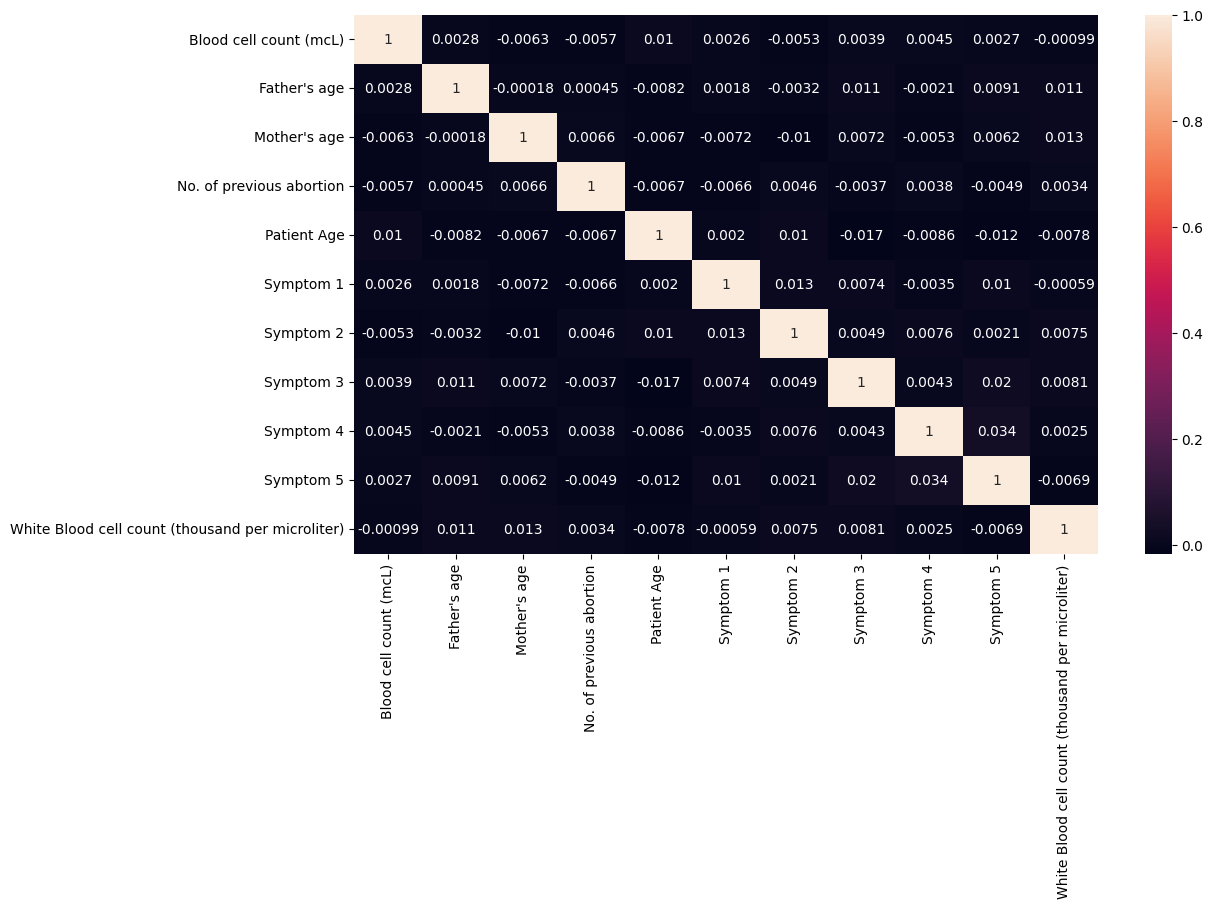

In [ ]:
# Visualizing the correlation matrix

plt.figure(figsize = (12, 7))
sns.heatmap(corr_matrix, annot = True)
plt.show()

### Data Visualization

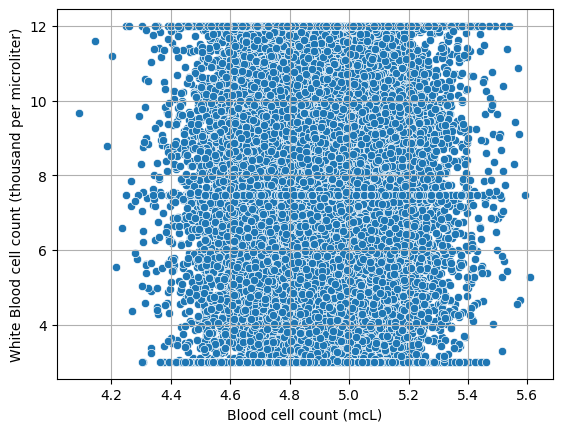

In [ ]:
# Scatter Plot  ("Blood cell count (mcL)" vs "White Blood cell count (thousand per microliter"))

plt.grid()
sns.scatterplot(x = "Blood cell count (mcL)", y = "White Blood cell count (thousand per microliter)", data = df)
plt.show()

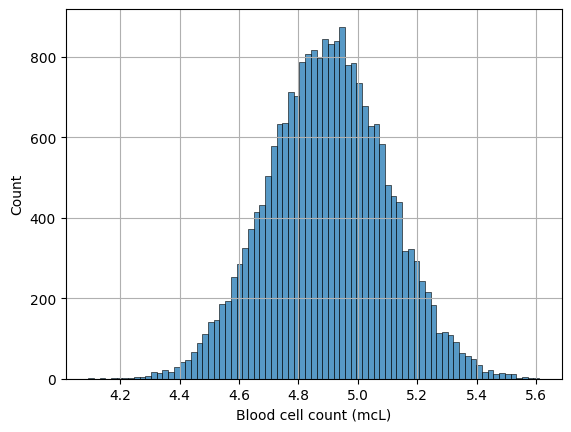

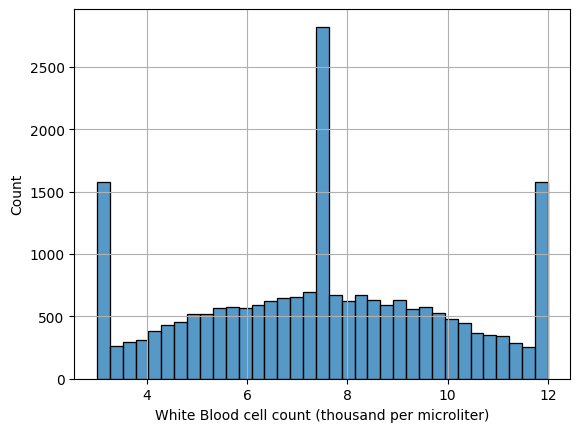

In [ ]:
# Histogram

for attr in np.array(["Blood cell count (mcL)", "White Blood cell count (thousand per microliter)"]):
    plt.grid()
    sns.histplot(x = attr, data = df)
    plt.show()

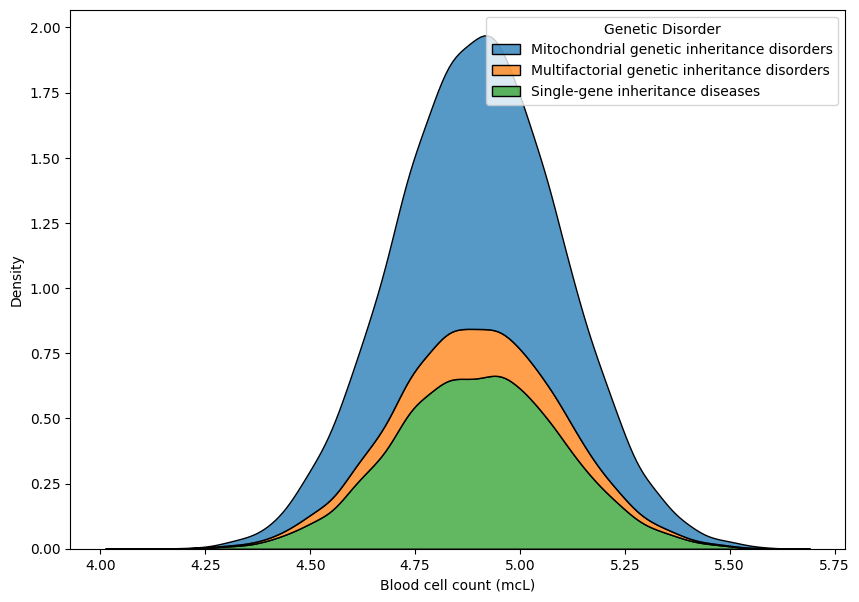

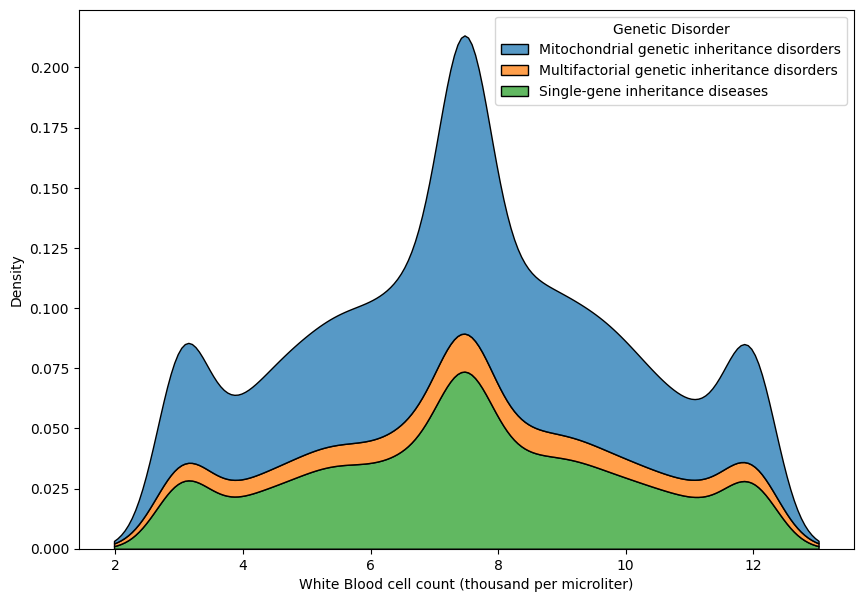

In [ ]:
# Density Plot ("Blood cell count (mcL)" and "White Blood cell count (thousand per microliter)")

for attr in np.array(["Blood cell count (mcL)", "White Blood cell count (thousand per microliter)"]):
    plt.figure(figsize = (10, 7))
    sns.kdeplot(x = attr, hue = target, multiple = "stack", data = df)
    plt.show()

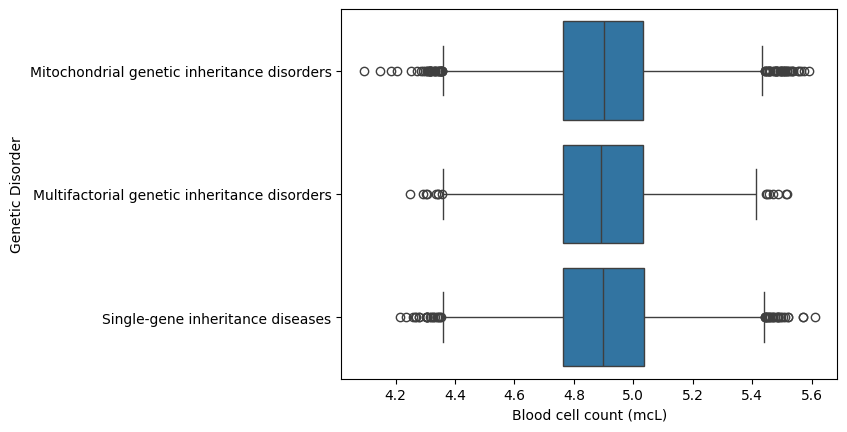

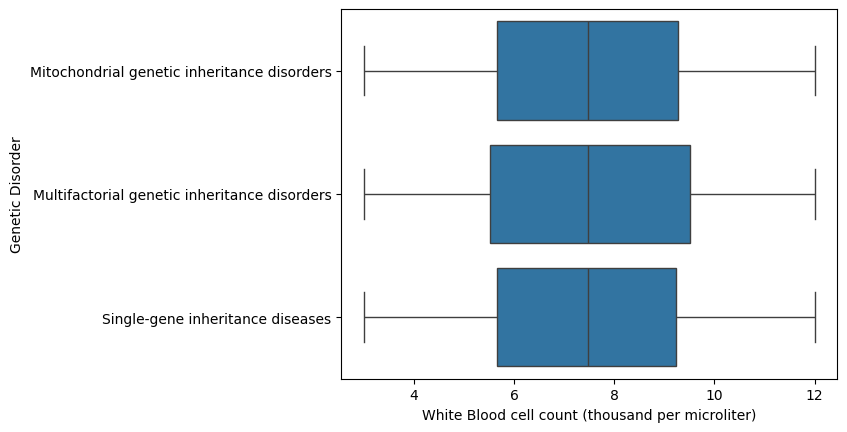

In [ ]:
# Box Plot ("Blood cell count (mcL)" and "White Blood cell count (thousand per microliter)") -> reveals skeness in the data

for attr in np.array(["Blood cell count (mcL)", "White Blood cell count (thousand per microliter)"]):
    sns.boxplot(x = attr, y = target, data = df)
    plt.show()

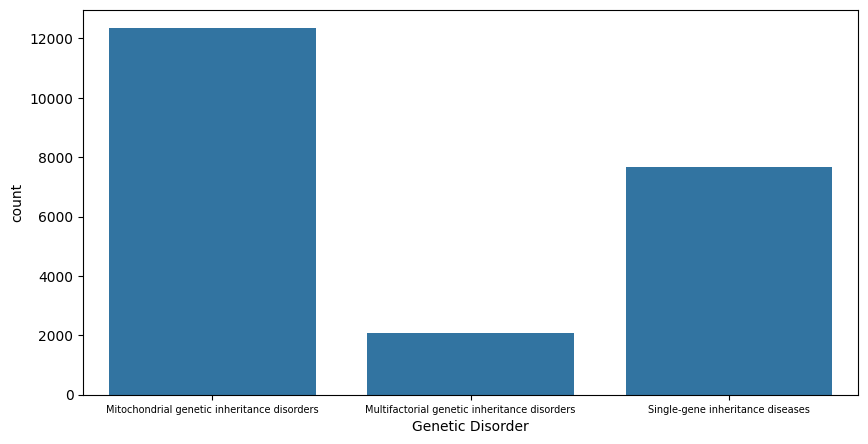

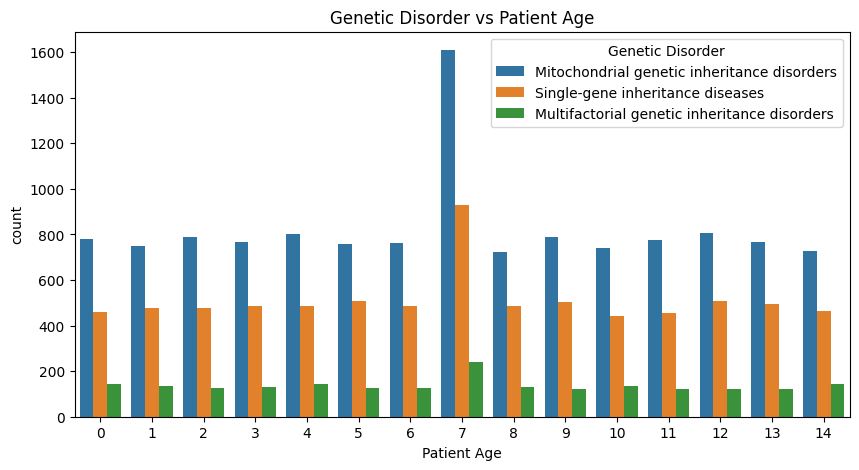

In [ ]:
# Count Plot

plt.figure(figsize = (10, 5))
plt.xticks(fontsize = 7)
sns.countplot(x = df[target])
plt.show()

plt.figure(figsize = (10, 5))
plt.title(f"{target} vs Patient Age")
sns.countplot(x = "Patient Age", hue = target, data = df)
plt.show()

### Data Preprocessing and Preparation

#### Encoding

In [ ]:
# Encoding categorical attributes ( Ordinal Encoding )

encoder = preprocessing.OrdinalEncoder()

encoded_cat = pd.DataFrame(encoder.fit_transform(df.loc[:, ordinal_cols]).astype(int), columns = ordinal_cols)

df = pd.concat([df.drop(ordinal_cols, axis = 1), encoded_cat], axis = 1)
df.head()

,Patient Age,Blood cell count (mcL),Mother's age,Father's age,Gender,No. of previous abortion,White Blood cell count (thousand per microliter),Blood test result,Symptom 1,Symptom 2,...,Paternal gene,Status,Respiratory Rate (breaths/min),Heart Rate (rates/min,Follow-up,Place of birth,Folic acid details (peri-conceptional),Assisted conception IVF/ART,History of anomalies in previous pregnancies,Birth defects
0,2,4.760603,35,42,Ambiguous,2,9.857562,slightly abnormal,1,1,...,0,0,0,0,0,1,0,0,1,1
1,4,4.910669,35,23,Ambiguous,2,5.522560,normal,1,1,...,0,1,1,0,0,1,1,0,1,0
2,6,4.893297,41,22,Ambiguous,4,7.477132,normal,0,1,...,0,0,0,1,1,1,1,1,1,1
3,12,4.705280,21,42,Male,1,7.919321,inconclusive,0,0,...,0,1,1,0,0,1,0,1,1,1
4,11,4.720703,32,42,Male,4,4.098210,slightly abnormal,0,0,...,1,0,1,1,1,1,0,1,0,0


In [ ]:
print(df[target].value_counts())

0    12348
2     7664
1     2071
Name: Genetic Disorder, dtype: int64


In [ ]:
df.shape

(22083, 28)

In [ ]:
# Encoding categorical attributes ( One Hot Encoding )

rem_cols = np.setdiff1d(cat_cols, ordinal_cols)

dummies = pd.get_dummies(df.loc[:, rem_cols], drop_first = True).astype(int)

df = pd.concat([df.drop(rem_cols, axis = 1), dummies], axis = 1)

In [ ]:
df.shape

(22083, 38)

In [ ]:
# Correlation with the target ( Pearson's correlation )

print(f"Correlation of each attribute with the target ({target}) :\n")
df.corr()[target].sort_values(ascending = False)[1:]

Correlation of each attribute with the target (Genetic Disorder) :



Disorder Subclass_Cystic fibrosis                        0.480362
Disorder Subclass_Tay-Sachs                              0.420224
Disorder Subclass_Hemochromatosis                        0.282299
Disorder Subclass_Diabetes                               0.039315
Gender_Male                                              0.014341
Respiratory Rate (breaths/min)                           0.014163
Symptom 5                                                0.011349
Disorder Subclass_Cancer                                 0.010754
Heart Rate (rates/min                                    0.009927
Father's age                                             0.007008
Blood test result_slightly abnormal                      0.006922
Mother's age                                             0.003376
Patient Age                                              0.001761
White Blood cell count (thousand per microliter)         0.001382
Blood cell count (mcL)                                   0.001293
Assisted c

#### Data Preparation

In [ ]:
X = df.drop(target, axis = 1).values
y = df[target].values

In [ ]:
print(X.shape, y.shape)

(22083, 37) (22083,)


In [ ]:
# Splitting the data into training and testing data ( Strtification )

X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, random_state = 3, test_size = 0.2, stratify = y)

print(X_train.shape, X_test.shape)

(17666, 37) (4417, 37)


In [ ]:
# Scaling the features ( Min-Max Normalization )

scaler = preprocessing.MinMaxScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.fit_transform(X_test)

In [ ]:
X_train = X_train_scaled.copy()
X_test = X_test_scaled.copy()

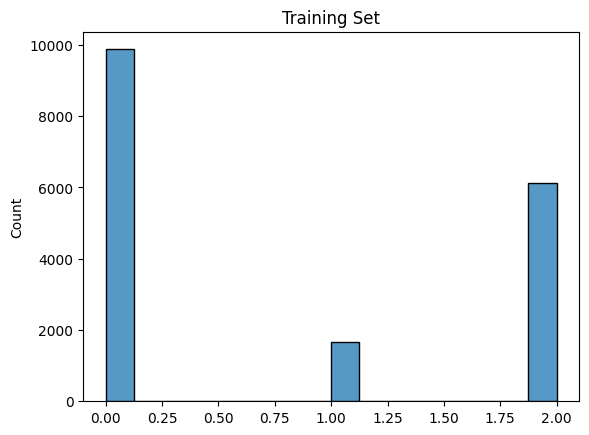

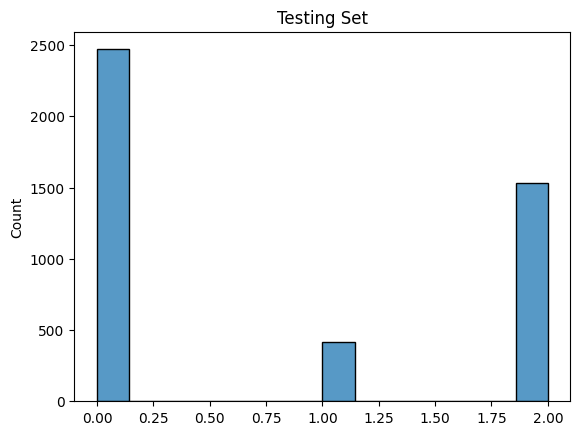

In [ ]:
# Uniform distribution of categores in the target variable for both the sets

plt.title("Training Set")
sns.histplot(x = y_train)
plt.show()

plt.title("Testing Set")
sns.histplot(x = y_test)
plt.show()

### Training the Model

In [ ]:
from sklearn.svm import SVC

In [ ]:
model11 = SVC()

In [ ]:
model11.fit(X_train, y_train)

SVC()

In [ ]:
model11.predict(X_test)

array([2, 0, 1, ..., 0, 0, 0])

In [ ]:
model11.score(X_test, y_test)

0.9130631650441476

In [ ]:
from sklearn.ensemble import RandomForestClassifier
RF = RandomForestClassifier()

In [ ]:
RF.fit(X_train, y_train)

RandomForestClassifier()

In [ ]:
RF.predict(X_test)

array([2, 0, 1, ..., 0, 0, 0])

In [ ]:
RF.score(X_test, y_test)

0.9128367670364501

In [ ]:
# Training an ANN

model = tf.keras.models.Sequential([
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(units = 100, activation = "relu"),
        tf.keras.layers.Dense(units = 100, activation = "relu"),
        tf.keras.layers.Dense(units = 100, activation = "relu"),
    tf.keras.layers.Dense(units = 100, activation = "relu"),


    tf.keras.layers.Dense(units = 3, activation = "softmax"),
])

model.compile(loss = "sparse_categorical_crossentropy", optimizer = "adam", metrics = ["acc"])

In [ ]:
model.fit(X_train, y_train, epochs = 5)

Epoch 1/5
553/553 [==============================] - 4s 3ms/step - loss: 0.3487 - acc: 0.8912
Epoch 2/5
553/553 [==============================] - 2s 4ms/step - loss: 0.2795 - acc: 0.9183
Epoch 3/5
553/553 [==============================] - 3s 5ms/step - loss: 0.2689 - acc: 0.9188
Epoch 4/5
553/553 [==============================] - 2s 3ms/step - loss: 0.2623 - acc: 0.9185
Epoch 5/5
553/553 [==============================] - 2s 3ms/step - loss: 0.2589 - acc: 0.9188


Epoch 1/10
553/553 [==============================] - 2s 4ms/step - loss: 0.2513 - acc: 0.9201 - val_loss: 0.2874 - val_acc: 0.9099
Epoch 2/10
553/553 [==============================] - 5s 8ms/step - loss: 0.2466 - acc: 0.9201 - val_loss: 0.2851 - val_acc: 0.9117
Epoch 3/10
553/553 [==============================] - 3s 5ms/step - loss: 0.2412 - acc: 0.9214 - val_loss: 0.2931 - val_acc: 0.9126
Epoch 4/10
553/553 [==============================] - 2s 4ms/step - loss: 0.2376 - acc: 0.9218 - val_loss: 0.3181 - val_acc: 0.9085
Epoch 5/10
553/553 [==============================] - 2s 4ms/step - loss: 0.2340 - acc: 0.9210 - val_loss: 0.3119 - val_acc: 0.9088
Epoch 6/10
553/553 [==============================] - 2s 4ms/step - loss: 0.2223 - acc: 0.9242 - val_loss: 0.3155 - val_acc: 0.9036
Epoch 7/10
553/553 [==============================] - 3s 5ms/step - loss: 0.2171 - acc: 0.9249 - val_loss: 0.3186 - val_acc: 0.9072
Epoch 8/10
553/553 [==============================] - 3s 5ms/step - loss: 0.

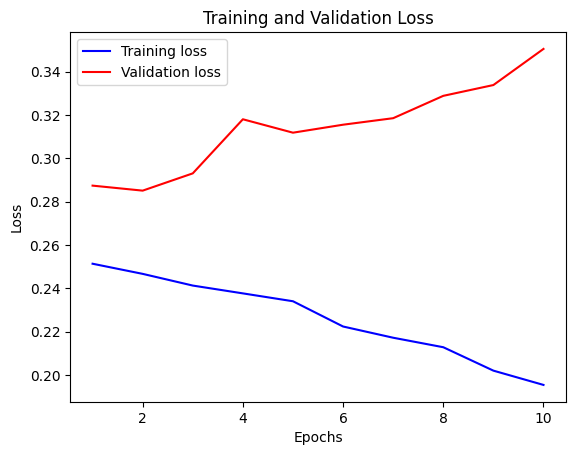

In [ ]:
import matplotlib.pyplot as plt
import tensorflow as tf

history = model.fit(X_train, y_train, epochs=10, validation_data=(X_test, y_test))

train_loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(train_loss) + 1)

plt.plot(epochs, train_loss, 'b', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()


In [ ]:
loss, acc = model.evaluate(X_train, y_train)

553/553 [==============================] - 2s 3ms/step - loss: 0.1813 - acc: 0.9359


In [ ]:
y_train_pred = model.predict(X_train)
y_train_pred_labels = np.array([np.argmax(y_) for y_ in y_train_pred])

553/553 [==============================] - 1s 2ms/step


tf.Tensor(
[[9033  171  674]
 [  39 1607   11]
 [ 233    5 5893]], shape=(3, 3), dtype=int32)


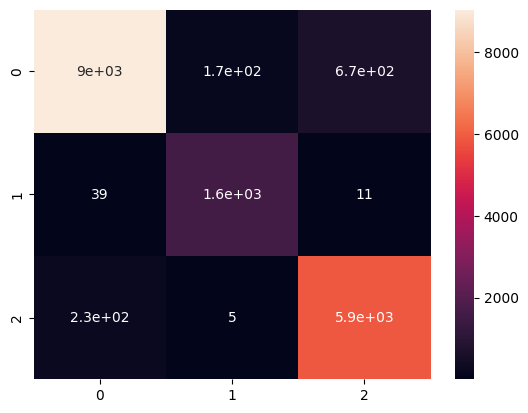

In [ ]:
# Confusion Matrix

cm = tf.math.confusion_matrix(y_train, y_train_pred_labels)
print(cm)

sns.heatmap(cm, annot = True)
plt.show()

In [ ]:
clf_report = metrics.classification_report(y_train, y_train_pred_labels)
print(clf_report)

              precision    recall  f1-score   support

           0       0.97      0.91      0.94      9878
           1       0.90      0.97      0.93      1657
           2       0.90      0.96      0.93      6131

    accuracy                           0.94     17666
   macro avg       0.92      0.95      0.93     17666
weighted avg       0.94      0.94      0.94     17666



### Evaluating the Model's Performance

In [ ]:
loss, acc = model.evaluate(X_test, y_test)

139/139 [==============================] - 0s 2ms/step - loss: 0.3506 - acc: 0.9006


In [ ]:
y_test_pred = model.predict(X_test)
y_test_pred_labels = np.array([np.argmax(y_) for y_ in y_test_pred])

139/139 [==============================] - 0s 2ms/step


tf.Tensor(
[[2208   51  211]
 [  26  383    5]
 [ 140    6 1387]], shape=(3, 3), dtype=int32)


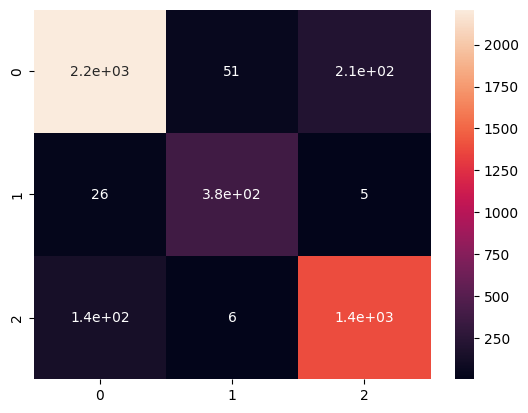

In [ ]:
# Confusion Matrix
cm = tf.math.confusion_matrix(y_test, y_test_pred_labels)
print(cm)

graph1 = sns.heatmap(cm, annot=True)

# Save the image to a file

plt.show()


In [ ]:
clf_report = metrics.classification_report(y_test, y_test_pred_labels)
print(clf_report)

              precision    recall  f1-score   support

           0       0.93      0.89      0.91      2470
           1       0.87      0.93      0.90       414
           2       0.87      0.90      0.88      1533

    accuracy                           0.90      4417
   macro avg       0.89      0.91      0.90      4417
weighted avg       0.90      0.90      0.90      4417



### Saving the Model into Memory

In [ ]:
model.save("genetic_disorder_model.h5")

In [ ]:
model_new = tf.keras.models.load_model("/content/genetic_disorder_model.h5")

In [ ]:
model_new.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 37)                0         
                                                                 
 dense (Dense)               (None, 100)               3800      
                                                                 
 dense_1 (Dense)             (None, 100)               10100     
                                                                 
 dense_2 (Dense)             (None, 100)               10100     
                                                                 
 dense_3 (Dense)             (None, 100)               10100     
                                                                 
 dense_4 (Dense)             (None, 3)                 303       
                                                                 
Total params: 34403 (134.39 KB)
Trainable params: 34403 

In [ ]:
loss1 , acc1 = model_new.evaluate(X_test, y_test , verbose = 2)

139/139 - 0s - loss: 0.3506 - acc: 0.9006 - 370ms/epoch - 3ms/step


In [ ]:
print(acc1)

0.9006112813949585


In [ ]:
X_test[10]

array([0.92857143, 0.39129998, 0.        , 0.45454545, 0.5       ,
       0.80372133, 1.        , 1.        , 0.        , 0.        ,
       0.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       0.        , 1.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 1.        , 0.        , 0.        ,
       0.        , 0.        ])

In [ ]:
from tensorflow.keras.models import load_model
model1 = load_model('/content/genetic_disorder_model.h5')

In [ ]:
from sklearn.metrics import accuracy_score
from sklearn.ensemble import BaggingClassifier

# Assuming you have three models named model, model11, and RF

# Create a list of your models
models = [model, model11, RF]

# Create a BaggingClassifier
bagging_clf = BaggingClassifier(base_estimator=None, n_estimators=len(models), random_state=42)

# Fit the BaggingClassifier on your data
bagging_clf.fit(X_train, y_train)  # Replace X_train and y_train with your training data

# Predict using the bagging classifier
predictions = bagging_clf.predict(X_test)  # Replace X_test with your test data

accuracy = accuracy_score(y_test, predictions)
print(f"Accuracy of the Bagging Classifier: {accuracy}")


Accuracy of the Bagging Classifier: 0.8775186778356351


In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

# Assuming you have three models named model, model11, and RF

# Create a list of your models
models = [model, model11, RF]

# Initialize an empty list to store trained models
trained_models = []

# Initialize a multi-dimensional array to hold the binary labels for each class
chain_y_train = np.zeros((len(y_train), len(models)))

# Train classifiers in a chain-like manner
for i, clf in enumerate(models):
    chain_classifier = DecisionTreeClassifier(max_depth=3)  # Customize as needed
    chain_y_train[:, i] = (y_train == i).astype(int)  # Set labels for the current class

    chain_classifier.fit(X_train, chain_y_train[:, i])  # Train on individual labels

    trained_models.append(chain_classifier)  # Store trained models

# Make predictions using the chain of classifiers
predictions = []
for clf in trained_models:
    prediction = clf.predict(X_test)
    predictions.append(prediction)

# Combine predictions into a final result (assuming multiclass problem)
import numpy as np
final_predictions = np.argmax(np.array(predictions).T, axis=1)  # Take the class with the highest vote

# Evaluate the performance
accuracy = accuracy_score(y_test, final_predictions)
print(f"Accuracy of the chain of classifiers: {accuracy}")




Accuracy of the chain of classifiers: 0.908535204890197


In [ ]:
from sklearn.metrics import classification_report

# Generate the classification report
clf_report = classification_report(y_test, final_predictions)


# Print the classification report
print("Classification Report for Chain Classifier Model:")
print(clf_report)


Classification Report for Chain Classifier Model:
              precision    recall  f1-score   support

           0       0.91      0.93      0.92      2470
           1       0.91      0.85      0.88       414
           2       0.91      0.89      0.90      1533

    accuracy                           0.91      4417
   macro avg       0.91      0.89      0.90      4417
weighted avg       0.91      0.91      0.91      4417



In [ ]:
from IPython.display import display, HTML

# Define a variable to store the collected inputs
collected_inputs = []

# Create an HTML form to collect 27 inputs
form = """
<style>
  /* Set the background color of the body to pink */
  body {
    color: black;
    background: linear-gradient(113.5deg, rgb(234, 234, 234) 22.3%, rgb(201, 234, 211) 56.6%, rgb(255, 180, 189) 90.9%);
  }
    .center {
    text-align: center;
  }

  h1{
      color: #005792;
  }

  table {
    border-collapse: collapse;
    margin: 0 auto;
  }

  table, th, td {
    border: 1px solid black;
  }

  td {
    padding: 8px;
  }

  /* Set the input box background color to lavender */
  input[type="text"] {
    width: 100px;
    padding: 5px;
    border: 1px solid #ccc;
    background-color: lavender;
    color: black; /* Set text color to dark black */
  }

  /* Set the submit button background color to dark green and text color to white */
  button {
    background-color: darkgreen;
    color: white;
    padding: 10px 20px;
    border: none;
    cursor: pointer;
  }

  button:hover {
    background-color: #0056b3;
  }
</style>
<form>
  <div class="center">
  <h1><b> Enter 37 Inputs:</b></h1>
 <br><br>
  <table>
    <tr>
      <td>1.Patient SNP rate</td>
      <td><input type="text" id="name1"></td>
      <td>2.Blood cell count (mcL)</td>
      <td><input type="text" id="name2"></td>
      <td>3.Mother's age</td>
      <td><input type="text" id="name3"></td>
    </tr>
    <tr>
      <td>4.Father's age</td>
      <td><input type="text" id="name4"></td>
      <td>5.No. of previous abortion</td>
      <td><input type="text" id="name5"></td>
      <td>6.White Blood cell count (thousand permicroliter)</td>
      <td><input type="text" id="name6"></td>
    </tr>
    <tr>
      <td>7.Symptom 1</td>
      <td><input type="text" id="name7"></td>
      <td>8.Symptom 2</td>
      <td><input type="text" id="name8"></td>
      <td>9.Symptom 3</td>
      <td><input type="text" id="name9"></td>
    </tr>
    <tr>
      <td>10.Symptom 4</td>
      <td><input type="text" id="name10"></td>
      <td>11.Disorder Subclass_Cancer</td>
      <td><input type="text" id="name11"></td>
      <td>12.Disorder Subclass_Cystic fibrosis</td>
      <td><input type="text" id="name12"></td>
    </tr>
    <tr>
      <td>13.Disorder Subclass_Diabetes</td>
      <td><input type="text" id="name13"></td>
      <td>14.DisorderSubclass_Hemochromatosis</td>
      <td><input type="text" id="name14"></td>
      <td>15.Disorder Subclass_Leber's- hereditaryopticneuropathy</td>
      <td><input type="text" id="name15"></td>
    </tr>
    <tr>
      <td>16.Disorder Subclass_Leigh syndrome</td>
      <td><input type="text" id="name16"></td>
      <td>17.Disorder Subclass_Mitochondrial myopathy:</td>
      <td><input type="text" id="name17"></td>
      <td>18.Disorder Subclass_Tay-Sachs</td>
      <td><input type="text" id="name18"></td>
    </tr>
    <tr>
      <td>19.Gender_Female</td>
      <td><input type="text" id="name19"></td>
      <td>20.Gender_Male</td>
      <td><input type="text" id="name20"></td>
      <td>21. Ethnicity_African</td>
      <td><input type="text" id="name21"></td>
    </tr>
    <tr>
      <td>22: Ethnicity_Asian</td>
      <td><input type="text" id="name22"></td>
      <td>23: Ethnicity_Caucasian</td>
      <td><input type="text" id="name23"></td>
      <td> 24: Ethnicity_Hispanic </td>
      <td><input type="text" id="name24"></td>
    </tr>
    <tr>
      <td>25: Ethnicity_Native American</td>
      <td><input type="text" id="name25"></td>
      <td>26: Blood Type_A</td>
      <td><input type="text" id="name26"></td>
      <td>27: Blood Type_B</td>
      <td><input type="text" id="name27"></td>
    </tr>
    <tr>
      <td>28: Blood Type_AB</td>
      <td><input type="text" id="name28"></td>
      <td>29: Blood Type_O</td>
      <td><input type="text" id="name29"></td>
      <td>30: Rh Factor_Positive</td>
      <td><input type="text" id="name30"></td>
    </tr>
    <tr>
      <td>31: Rh Factor_Negative</td>
      <td><input type="text" id="name31"></td>
      <td>32: Genetic Marker 1</td>
      <td><input type="text" id="name32"></td>
      <td>33: Genetic Marker 2</td>
      <td><input type="text" id="name33"></td>
    </tr>
    <tr>
      <td>34: Genetic Marker 3</td>
      <td><input type="text" id="name34"></td>
      <td>35: Genetic Marker 4</td>
      <td><input type="text" id="name35"></td>
      <td>36: Genetic Marker 5</td>
      <td><input type="text" id="name36"></td>
    </tr>
    <tr>
      <td>37: Genetic Marker 6</td>
      <td><input type="text" id="name37"></td>
      <td>Name (OPTIONAL)</td>
      <td><input type="text" id="name38"></td>
      <td>AGE (OPTIONAL) </td>
      <td><input type="text" id="name39"></td>
    </tr>
  </table><br><br>

   <button type="button" onclick="collectInputs()">Submit</button>
  </div>

</form>
<script>
  function collectInputs() {
    var inputs = [];
    var missingInputs = [];
    for (var i = 1; i <= 37; i++) {
      var inputElement = document.getElementById("name" + i);
      var inputText = inputElement.value.trim();
      inputs.push(inputText);
      if (inputText === "") {
        missingInputs.push(i);
      }
    }

    if (missingInputs.length > 0) {
      alert("Error: The following input(s) are missing: " + missingInputs.join(", "));
    } else {
      google.colab.kernel.invokeFunction('process_inputs', [inputs], {});
    }
  }
</script>
"""

display(HTML(form))

# Define a Python function to process the inputs
def process_inputs(inputs):
    # Process the inputs (you can replace this with your own processing logic)
    print("Received Inputs:")
    for i, input_value in enumerate(inputs):
        print(f"Name {i+1}: {input_value}")

    # Store the inputs in the collected_inputs variable for further use
    global collected_inputs
    collected_inputs = inputs

# Register the Python function to be callable from JavaScript
from google.colab import output
output.register_callback('process_inputs', process_inputs)

# Display the collected_inputs variable at the end of the HTML form
end_of_form = f"<p>Collected Inputs: {collected_inputs}</p>"
display(HTML(end_of_form))


1.Patient SNP rate,,2.Blood cell count (mcL),,3.Mother's age,
4.Father's age,,5.No. of previous abortion,,6.White Blood cell count (thousand permicroliter),
7.Symptom 1,,8.Symptom 2,,9.Symptom 3,
10.Symptom 4,,11.Disorder Subclass_Cancer,,12.Disorder Subclass_Cystic fibrosis,
13.Disorder Subclass_Diabetes,,14.DisorderSubclass_Hemochromatosis,,15.Disorder Subclass_Leber's- hereditaryopticneuropathy,
16.Disorder Subclass_Leigh syndrome,,17.Disorder Subclass_Mitochondrial myopathy:,,18.Disorder Subclass_Tay-Sachs,
19.Gender_Female,,20.Gender_Male,,21. Ethnicity_African,
22: Ethnicity_Asian,,23: Ethnicity_Caucasian,,24: Ethnicity_Hispanic,
25: Ethnicity_Native American,,26: Blood Type_A,,27: Blood Type_B,
28: Blood Type_AB,,29: Blood Type_O,,30: Rh Factor_Positive,
31: Rh Factor_Negative,,32: Genetic Marker 1,,33: Genetic Marker 2,


In [ ]:
import numpy as np
# Split the input string at commas and convert the values to float
collected_inputs = [float(value) for value in collected_inputs]
# Convert the list to a NumPy array
input_data = np.array(collected_inputs)


input_data = input_data.reshape((1, -1))  # Example reshaping, if necessary

# Make predictions using the model
predictions = bagging_clf.predict(input_data)
predicted_class = np.argmax(predictions)

print("Predicted Class:", predicted_class)


In [ ]:
print(predicted_class)

In [ ]:
from IPython.display import display, HTML

disorder_class=""

if predicted_class==0:
  disorder_class+="Multi Factorial Disorder"
elif predicted_class==1:
  disorder_class+="Mitochondrial Disorder"
else:
  disorder_class+="Single Gene Disorder"

# Value to display (replace with your value)
value_to_display = disorder_class

# Create an HTML template for the GUI
html_template = f"""
<!DOCTYPE html>
<html>
<head>
<link rel="preconnect" href="https://fonts.googleapis.com">
<link rel="preconnect" href="https://fonts.gstatic.com" crossorigin>
<link href="https://fonts.googleapis.com/css2?family=Young+Serif&display=swap" rel="stylesheet">

<style>
    /* CSS styles for the GUI */
h1 {{
        color: #455d7a; /* Change the text color to red */
    }}
    body {{
        font-family: 'Young Serif', serif;
        text-align: center;
        background: linear-gradient(to top, #9890e3 0%, #b1f4cf 100%);
         }}
    #value-container {{
        font-size: 30px;
        color: #333;
        font-family: 'Young Serif', serif;

    }}

</style>
</head>
<body>
    <h1><b>CLASS OF THE DISORDER</b> </h1><br><br>
    <div class="display_value" id="value-container">
        {value_to_display}
    </div>
</body>
</html>
"""

# Display the HTML template
display(HTML(html_template))

In [ ]:
from IPython.display import Image
Image(filename='confusion_matrix_heatmap.png')